In [1]:
import os

TENSORFLOW='/home/jupyter/ocr-digital-display/tensorflow'
paths = {
  'labelmap': os.path.join(TENSORFLOW,'label_map.pbtxt'),
  'scripts': os.path.join(TENSORFLOW,'scripts'),
}

In [ ]:
def tfrecord(path):
    head, name = os.path.split(path)
    return 'python {} -x {} -l {} -o {}'.format(
      os.path.join(paths['scripts'], 'generate_tfrecord.py'),
      os.path.join(path),
      os.path.join(paths['labelmap']),
      os.path.join(head, f'{name}.record'),
    )

In [28]:
!{tfrecord('/home/jupyter/ds/phils-workspace_digits-coi4f/train')}

Successfully created the TFRecord file: /home/jupyter/ds/phils-workspace_digits-coi4f/train.record


In [29]:
!{tfrecord('/home/jupyter/ds/phils-workspace_digits-coi4f/test')}

Successfully created the TFRecord file: /home/jupyter/ds/phils-workspace_digits-coi4f/test.record


In [37]:
!{tfrecord('/home/jupyter/ds/energy-meter/train')}

Successfully created the TFRecord file: /home/jupyter/ds/energy-meter/train.record


In [38]:
!{tfrecord('/home/jupyter/ds/energy-meter/test')}

Successfully created the TFRecord file: /home/jupyter/ds/energy-meter/test.record


## Visualize TFRecord

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

#import IPython.display
#import PIL

from object_detection.utils import visualization_utils as vu
from object_detection.utils import label_map_util
#from object_detection.protos import string_int_label_map_pb2 as pb
from object_detection.data_decoders.tf_example_decoder import TfExampleDecoder as TfDecoder
#from google.protobuf import text_format 

%matplotlib inline

2022-12-25 14:07:28.240640: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-25 14:07:29.075042: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/nccl2/lib:/usr/local/cuda/extras/CUPTI/lib64
2022-12-25 14:07:29.075176: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/nccl2/lib:/usr/loca

In [16]:
def visualise(rec_iter, label_map=None):
    category_index = label_map_util.create_category_index_from_labelmap(label_map, use_display_name=True)
    decoder = TfDecoder(label_map_proto_file=label_map, use_display_name=True)
    for record in rec_iter:
        host_example = decoder.decode(record)
        scores = np.ones(host_example['groundtruth_boxes'].shape[0])                                              
        host_example['image'] = host_example['image'].numpy()
        vu.visualize_boxes_and_labels_on_image_array( 
            host_example['image'],                                               
            host_example['groundtruth_boxes'].numpy(),                                                     
            host_example['groundtruth_classes'].numpy(),
            scores,
            category_index,
            max_boxes_to_draw=None,
            use_normalized_coordinates=True,
            line_thickness=4,
            skip_scores=True,
            agnostic_mode=False
        )
        %matplotlib inline
        plt.figure(figsize = (24,24))
        plt.imshow(host_example['image'])
        plt.axis('off')
        plt.show()
        #IPython.display.display(PIL.Image.fromarray(host_example['image']))

In [17]:
ds_iter = iter(tf.data.TFRecordDataset("/home/jupyter/ds/test.record").shuffle(50).take(5))

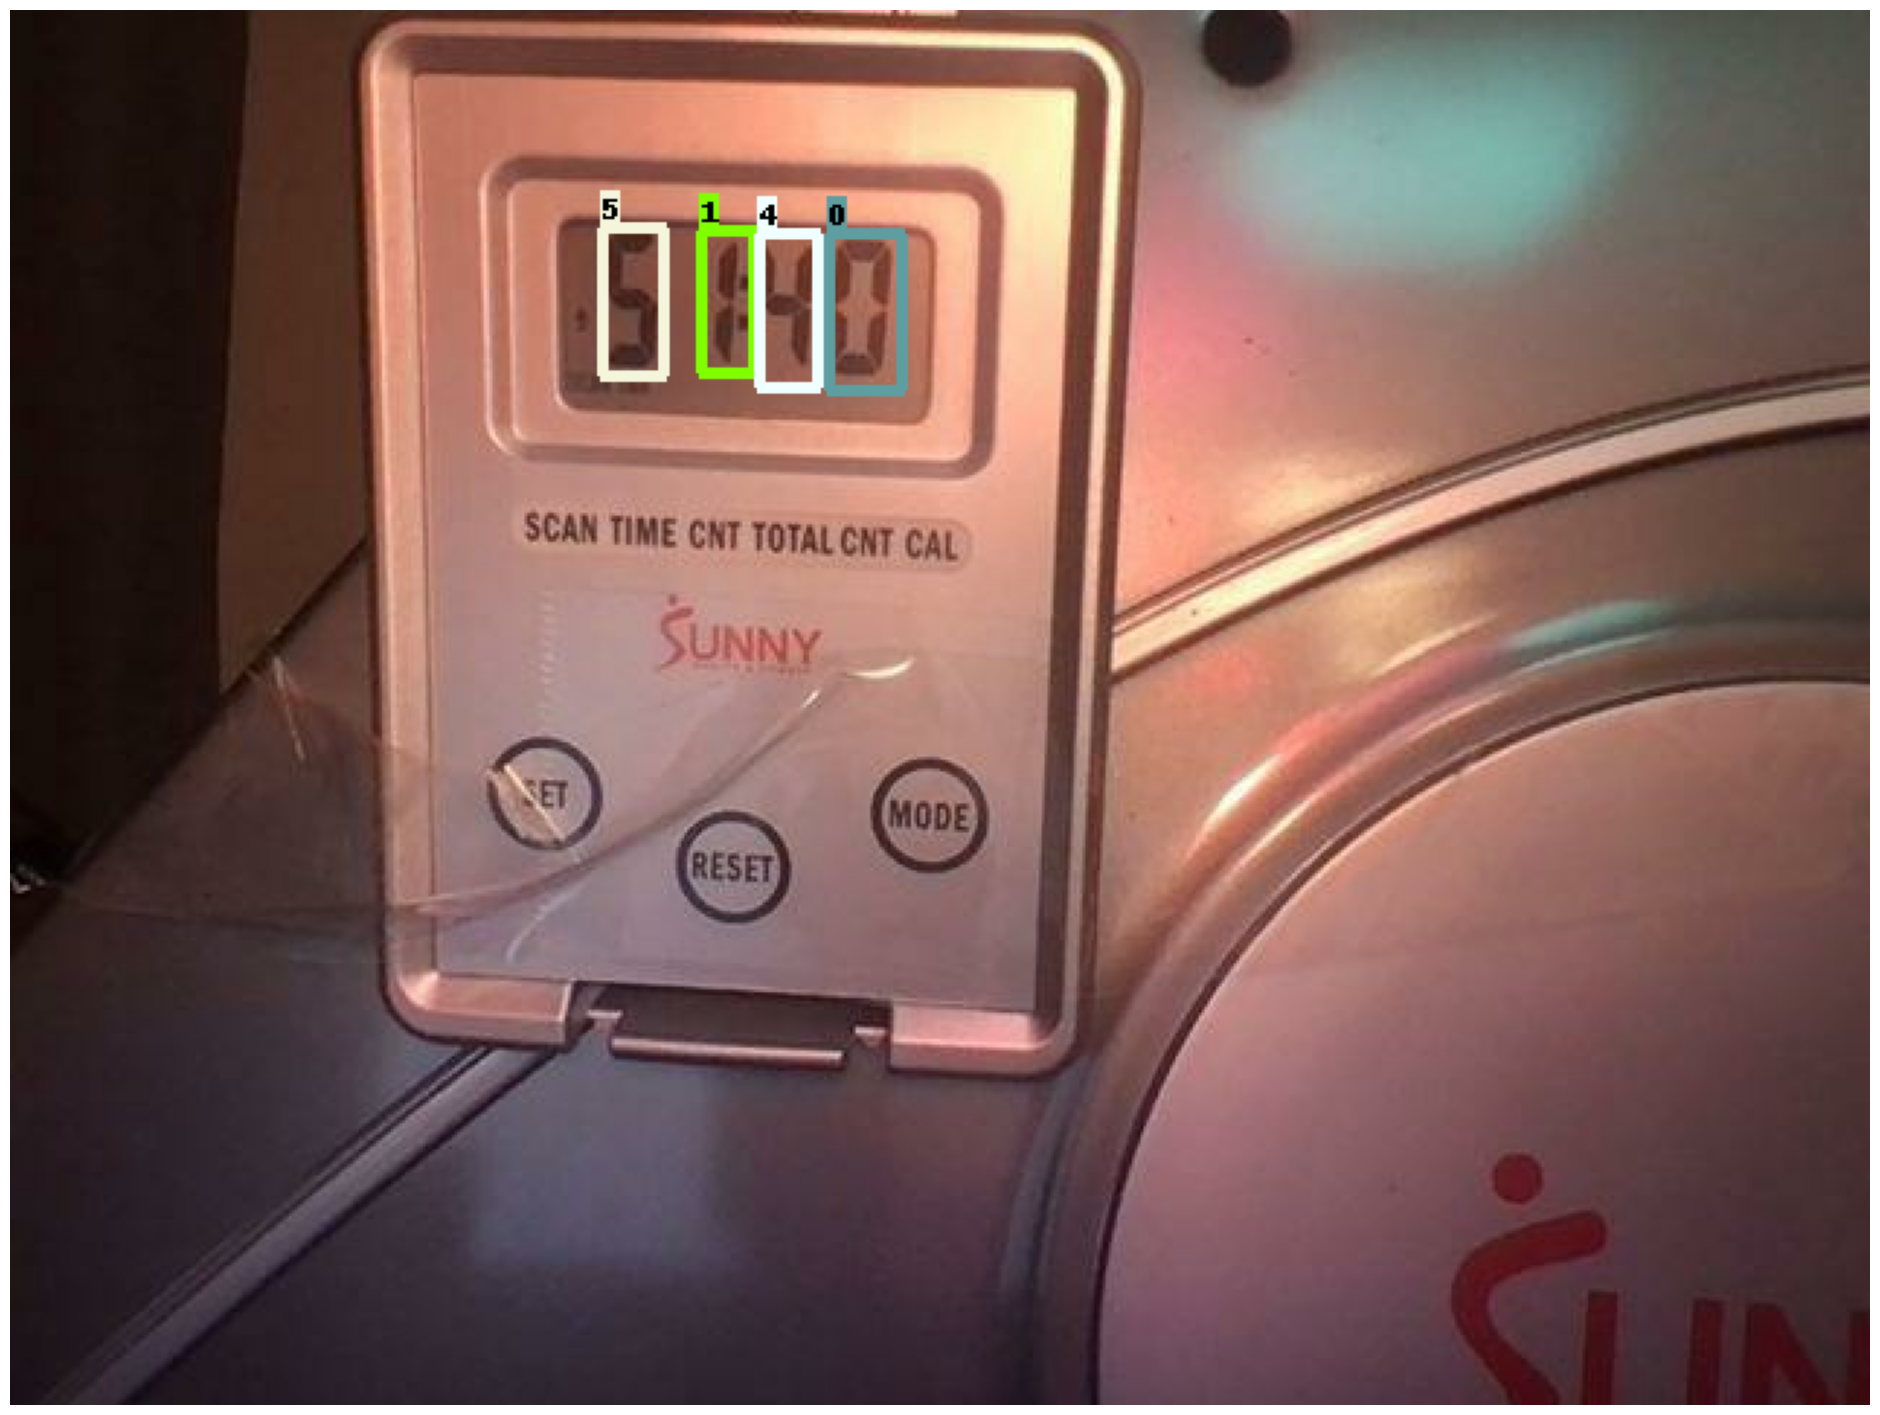

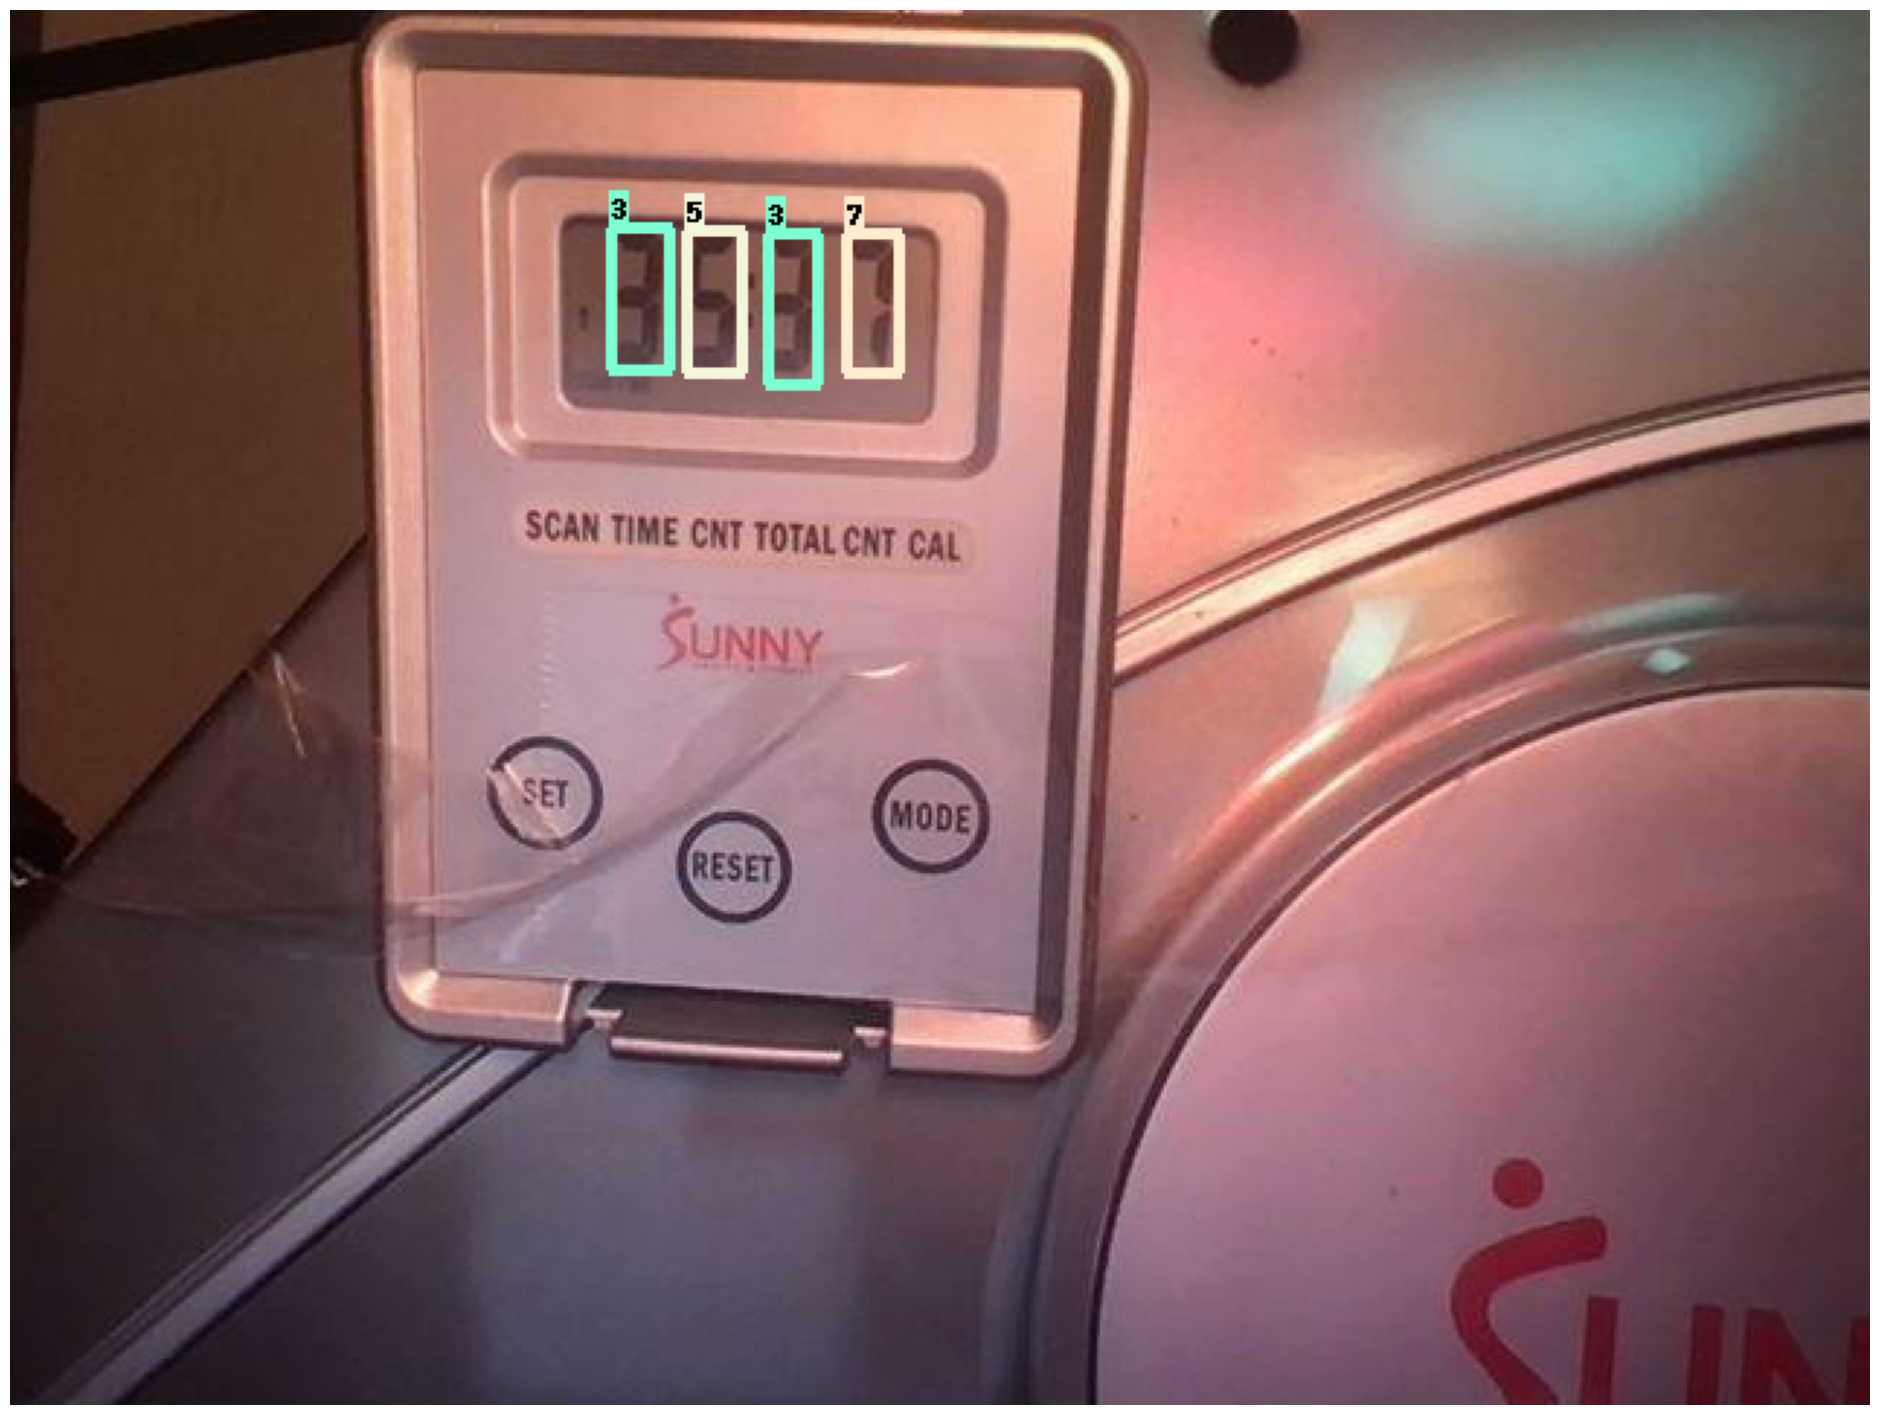

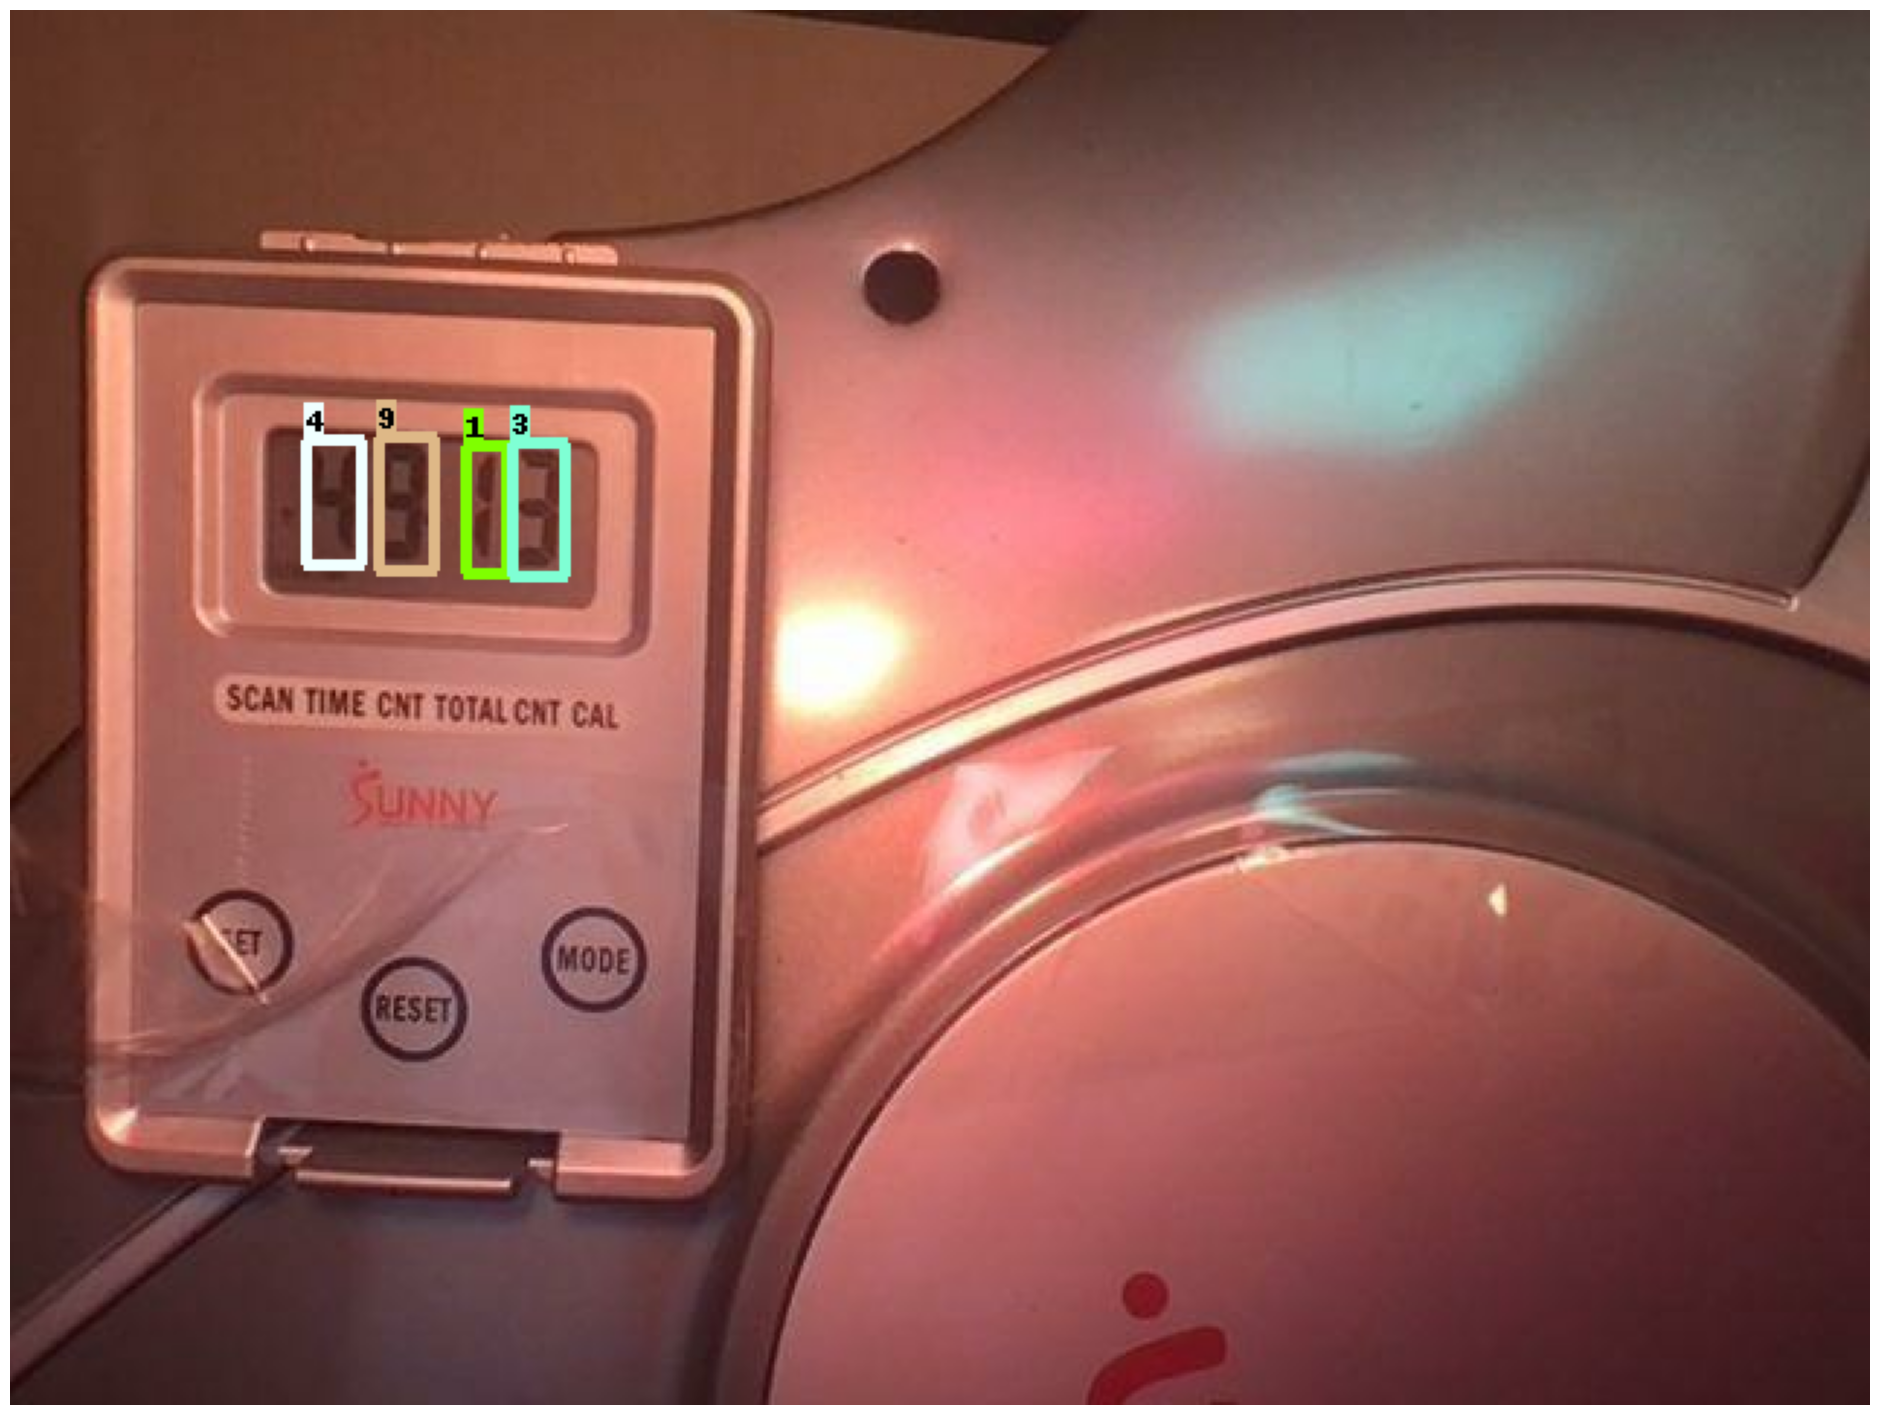

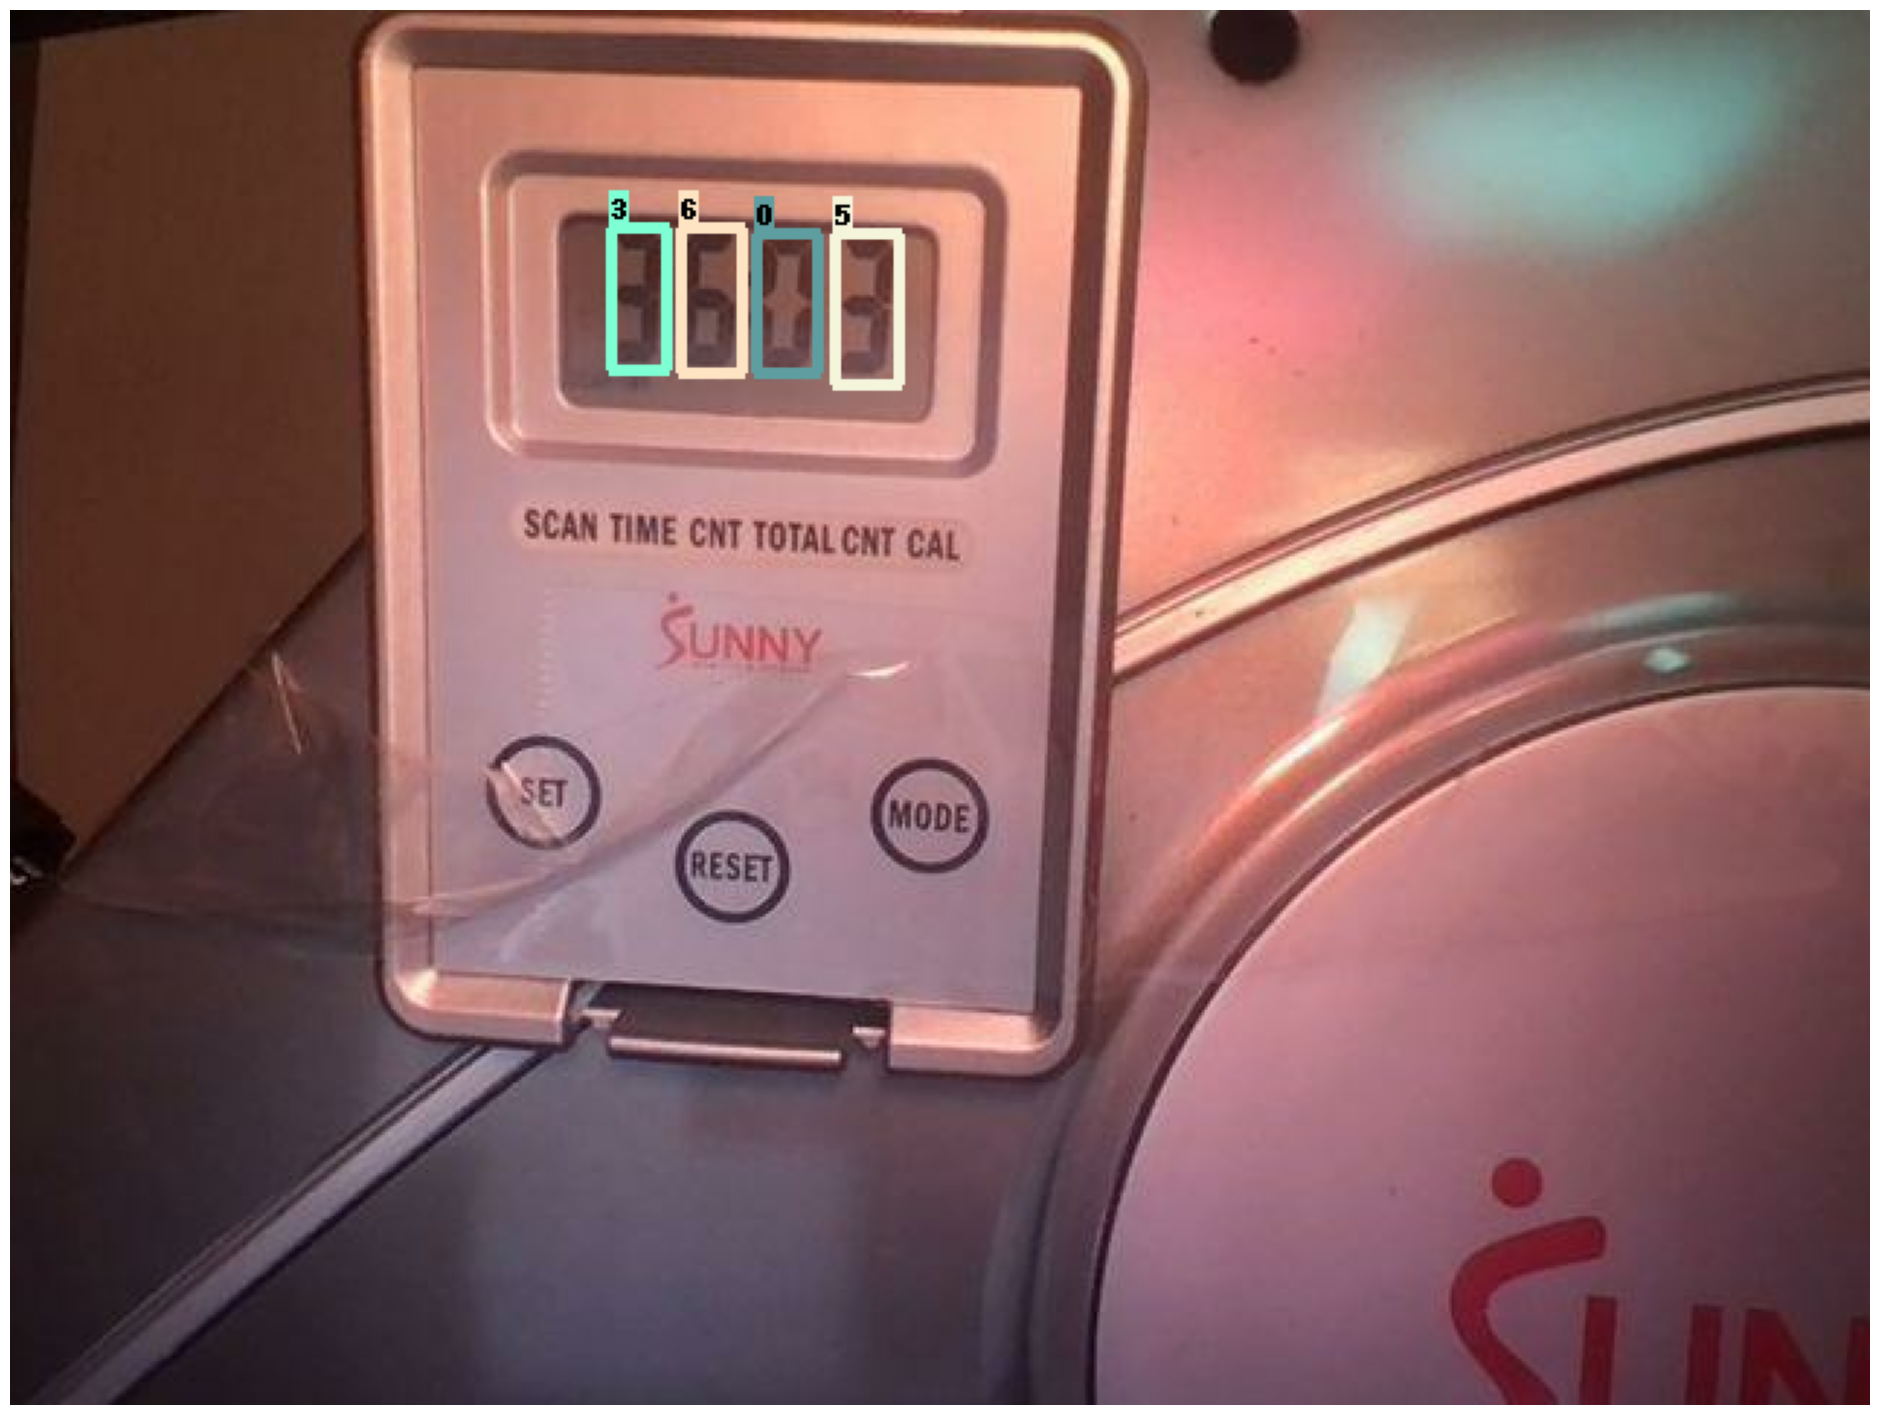

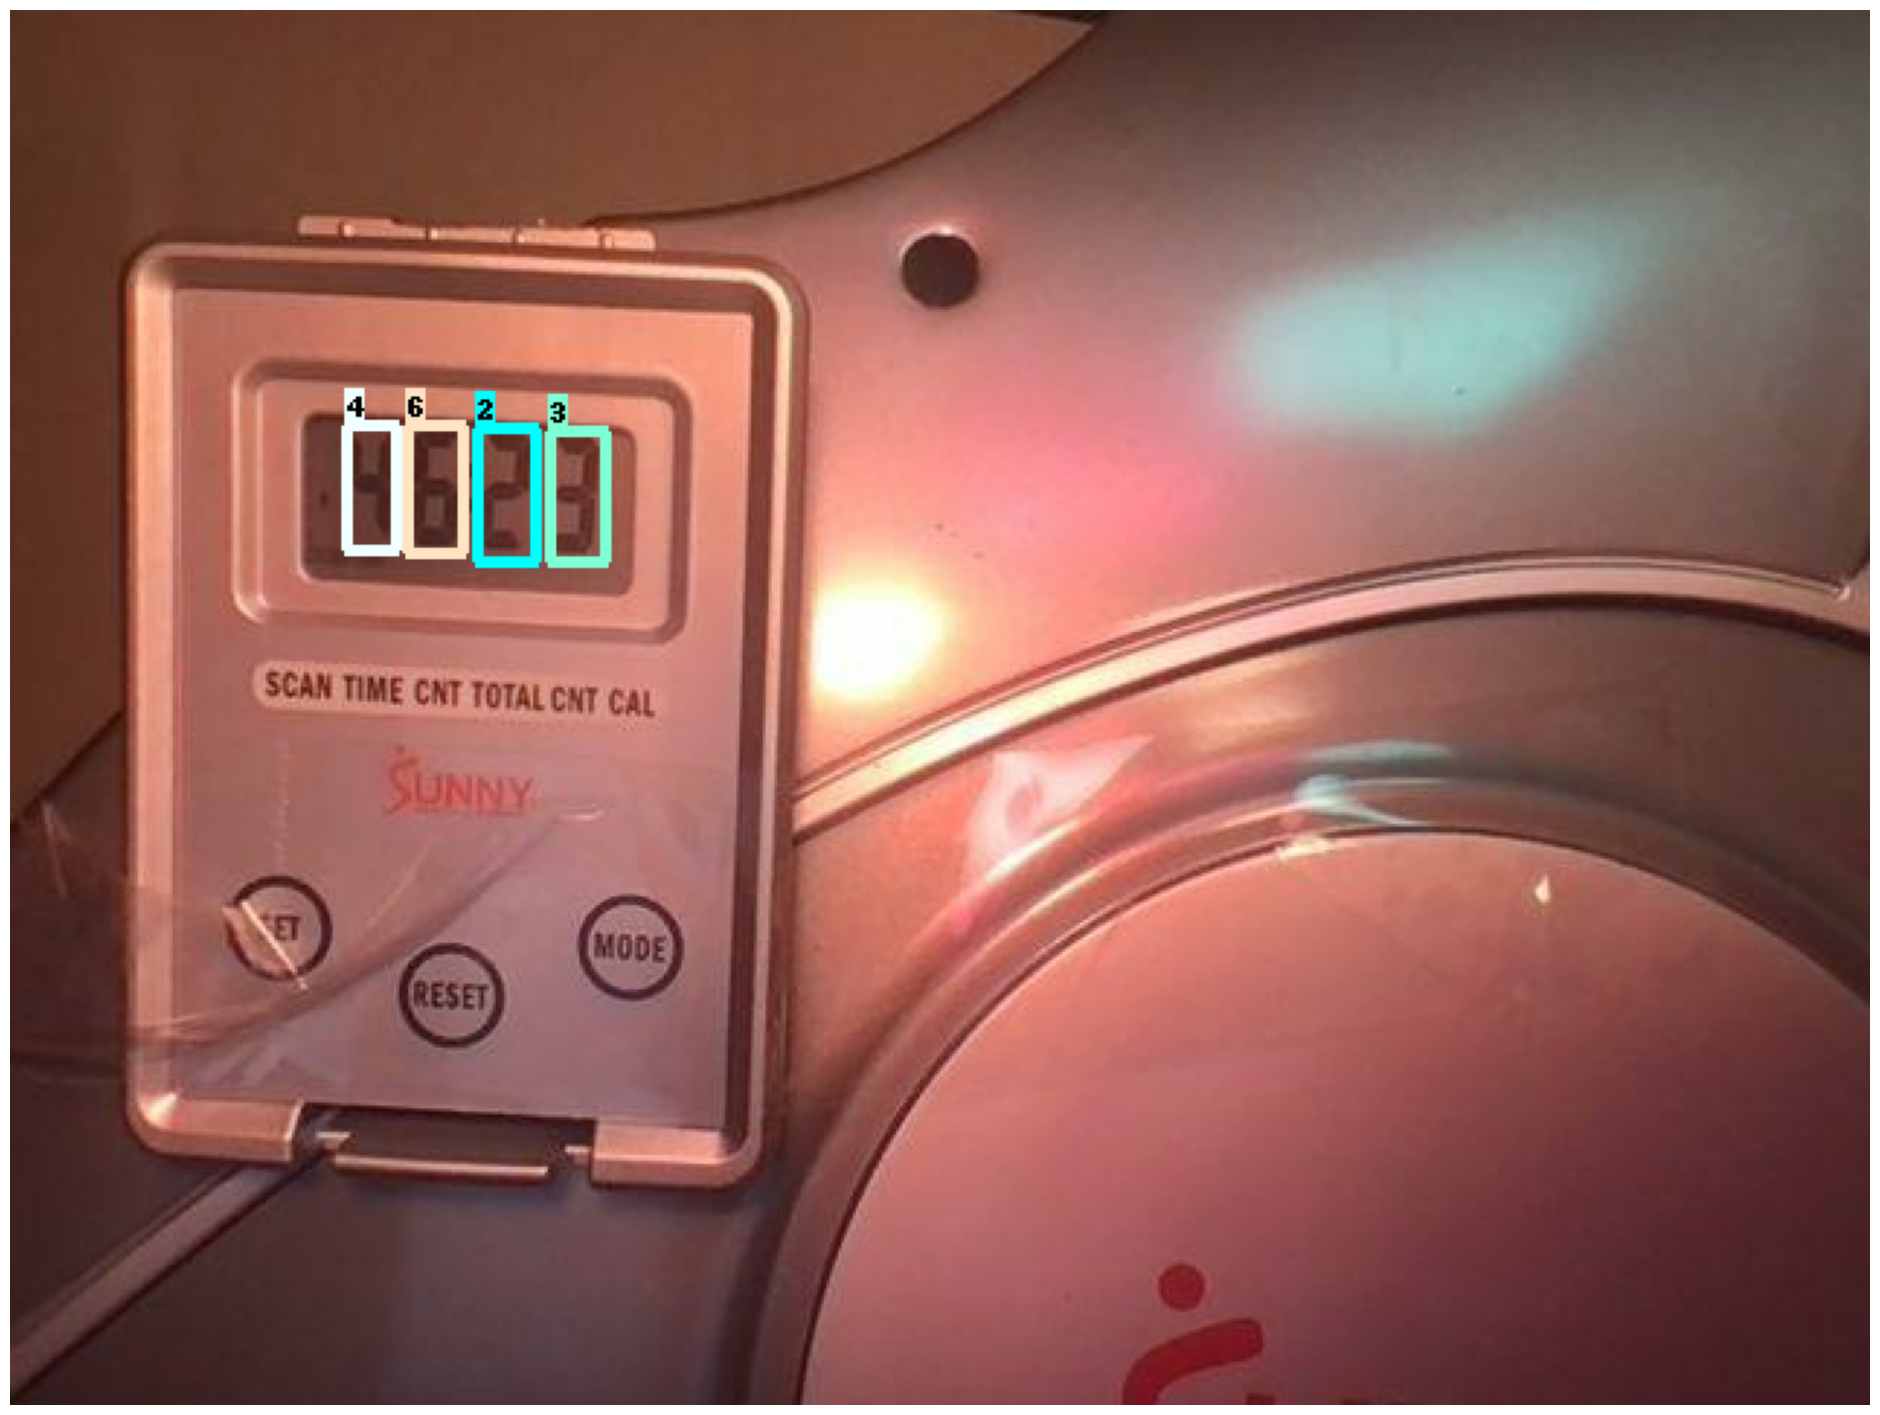

In [18]:
visualise(
    ds_iter,
    "/home/jupyter/ocr-digital-display/tensorflow/label_map.pbtxt"
)


In [92]:
from numba import cuda 
cuda.get_current_device().reset()